# 03 - CatBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
# Load dataset
df = pd.read_csv("bank_numeric.csv")

In [3]:
# Define features and target
target_column = "deposit"
X = df.drop(columns=[target_column])
y = df[target_column]

In [4]:
# Identify categorical features (if any)
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [5]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
# Initialize CatBoost classifier
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='Accuracy',
    random_seed=42,
    verbose=100  # Displays training progress
)

In [7]:
# Train the model
cat_model.fit(X_train, y_train, cat_features=categorical_features)

0:	learn: 0.8347206	total: 132ms	remaining: 1m 5s
100:	learn: 0.8784780	total: 376ms	remaining: 1.48s
200:	learn: 0.9029727	total: 605ms	remaining: 901ms
300:	learn: 0.9212842	total: 835ms	remaining: 552ms
400:	learn: 0.9346017	total: 1.06s	remaining: 261ms
499:	learn: 0.9462545	total: 1.29s	remaining: 0us


In [8]:
# Make predictions
y_pred = cat_model.predict(X_test)

In [ ]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# wow, even better results than in XGBoost
# maybe because it avoids overfitting better 
# than most tree-based models.


Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       609
           1       0.86      0.85      0.85       443

    accuracy                           0.88      1052
   macro avg       0.88      0.87      0.87      1052
weighted avg       0.88      0.88      0.88      1052



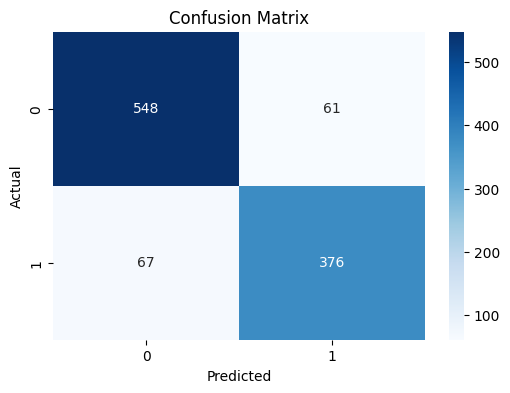

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# also, there are some improvements in the Confusion matrix